In [259]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [260]:
PATH = 'images/boxes'
INPUT_SIZE = (224, 224, 3)
EPOCHS = 100
BS = 10
LR = 1e-4

In [261]:
with open("categories.txt", "r") as file:
    categories = file.read().splitlines()
    
num_classes = len(categories)

In [262]:
dataset = []
X = []
y = []

i = 0
for folder in categories:
    files = os.listdir(f'{PATH}/{categories[i]}')
    for file in files:
        img = cv.imread(f'{PATH}/{categories[i]}/{file}')
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        img = cv.resize(img, INPUT_SIZE[:2])
        dataset.append([img, i])
    i += 1

In [235]:
for images, labels in dataset:
    X.append(images)
    y.append(labels)

In [236]:
X = np.array(X).reshape(-1, INPUT_SIZE[0], INPUT_SIZE[1], INPUT_SIZE[2])
X = X / 255

In [237]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

In [239]:
y_cat_train = to_categorical(y_train, num_classes)
y_cat_test = to_categorical(y_test, num_classes)

In [258]:
input = tf.keras.layers.Input(INPUT_SIZE)

conv_1 = Conv2D(filters=32, kernel_size=(3,3), activation='relu')(input)
pool_1 = MaxPool2D(pool_size=(2,2))(conv_1)

conv_2 = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(pool_1)
pool_2 = MaxPool2D(pool_size=(2,2))(conv_2)

flatten = Flatten()(pool_2)

dense = Dense(128)(flatten)
dropout = Dropout(0.2)(dense)

output = Dense(num_classes, activation="sigmoid")(dropout)

model = Model(inputs=[input], outputs=[output])
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=LR, decay=LR / EPOCHS), metrics=["accuracy"])

In [244]:
model.fit(X_train, y_cat_train, batch_size=BS, epochs=EPOCHS, validation_split=0.1, callbacks=[])

Train on 86 samples, validate on 10 samples
Epoch 1/10
86/86 [==============================] - 15s 178ms/sample - loss: 3.1051 - accuracy: 0.6686 - val_loss: 0.6649 - val_accuracy: 0.7000
Epoch 2/10
86/86 [==============================] - 15s 177ms/sample - loss: 0.7175 - accuracy: 0.6686 - val_loss: 0.5552 - val_accuracy: 0.7000
Epoch 3/10
86/86 [==============================] - 14s 168ms/sample - loss: 0.5826 - accuracy: 0.7558 - val_loss: 0.3941 - val_accuracy: 0.8000
Epoch 4/10
86/86 [==============================] - 14s 166ms/sample - loss: 0.4190 - accuracy: 0.8547 - val_loss: 0.4363 - val_accuracy: 0.8000
Epoch 5/10
86/86 [==============================] - 14s 164ms/sample - loss: 0.4070 - accuracy: 0.8953 - val_loss: 0.8699 - val_accuracy: 0.8000
Epoch 6/10
86/86 [==============================] - 17s 199ms/sample - loss: 0.7506 - accuracy: 0.8837 - val_loss: 6.0464 - val_accuracy: 0.5000
Epoch 7/10
86/86 [==============================] - 15s 178ms/sample - loss: 0.3196 - 

In [246]:
loss, acc = model.evaluate(X_test, y_cat_test)
print("LOSS: {}, ACC: {}".format(loss, acc * 100))

11/11 [==============================] - 0s 19ms/sample - loss: 1.0038 - accuracy: 0.6364


In [248]:
pred = model.predict(X_test)

0

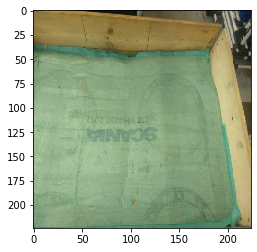

In [255]:
img = X_test[5]
plt.imshow(img)
img = img.reshape(-1, INPUT_SIZE[0], INPUT_SIZE[1], INPUT_SIZE[2])
model.predict(img)[0].argmax()

In [ ]:
model.save('models/emptybox.h5')

In [127]:
img = cv.imread('images/boxes/test/6.png', 1)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img.shape
img = cv.resize(img, (224,224))
img = img / 255
plt.imshow(img)
img = img.reshape(-1, INPUT_SIZE[0], INPUT_SIZE[1], INPUT_SIZE[2])
model.predict(img)


error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
